In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display charts directly in the notebook
%matplotlib inline

# Load the dataset
try:
    df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("✅ Dataset loaded successfully!")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
except FileNotFoundError:
    print("❌ Error: File not found. Did you move the CSV to the 'data' folder?")

# Show the first 5 rows and the Data Types
display(df.head())
print("\n--- Data Info ---")
df.info()

✅ Dataset loaded successfully!
Rows: 7043, Columns: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

## 1. Data Cleaning
The `TotalCharges` column was read as an object because it contains empty strings for customers with 0 tenure. We will force this column to numeric and fill missing values with 0.

In [2]:
# Convert TotalCharges to numeric, coercing errors (empty strings) to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many are missing
print(f"Missing values before filling: {df['TotalCharges'].isnull().sum()}")

# Fill missing values with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verify the fix
df.info()

Missing values before filling: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

## 2. Target Variable Analysis (Churn)
We need to check the distribution of our target variable `Churn`. An imbalanced dataset (where one class dominates) can bias our machine learning models.


--- Churn Percentage ---
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


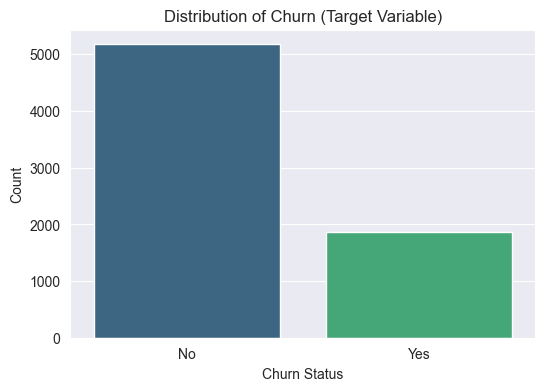

In [4]:
# Calculate counts
churn_counts = df['Churn'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, hue='Churn', palette='viridis', legend=False)
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn Status')
plt.ylabel('Count')

# Show exact percentages
print("\n--- Churn Percentage ---")
print(df['Churn'].value_counts(normalize=True) * 100)

plt.show()

## 3. Correlation Analysis
To identify which numerical features correlate most strongly with Churn, we first convert the target variable to numeric (Yes=1, No=0). Then we visualize the relationships using a heatmap.

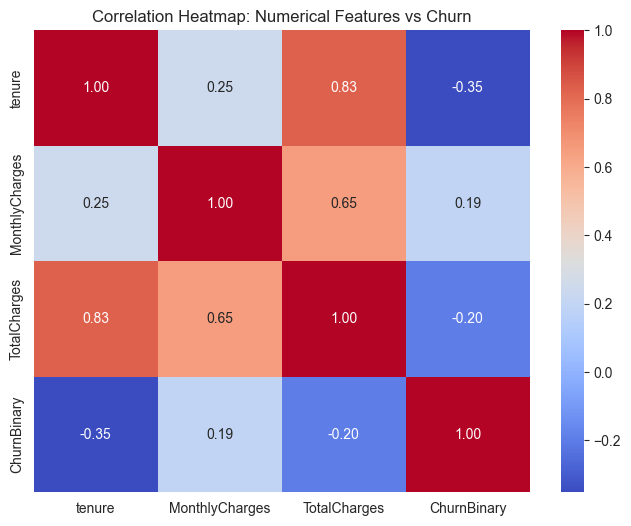


--- Correlation with Churn ---
ChurnBinary       1.000000
MonthlyCharges    0.193356
TotalCharges     -0.198324
tenure           -0.352229
Name: ChurnBinary, dtype: float64


In [5]:
# 1. Convert 'Churn' to binary for calculation
df['ChurnBinary'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 2. Select only numerical columns for correlation
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnBinary']
corr_matrix = df[numerical_cols].corr()

# 3. Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Numerical Features vs Churn')
plt.show()

# 4.Print correlations with Churn
print("\n--- Correlation with Churn ---")
print(corr_matrix['ChurnBinary'].sort_values(ascending=False))

## 4. Categorical Feature Analysis
We will analyze key categorical features (`Contract`, `InternetService`, `PaymentMethod`) to see how they impact churn rates. This helps profile the "high-risk" customer.

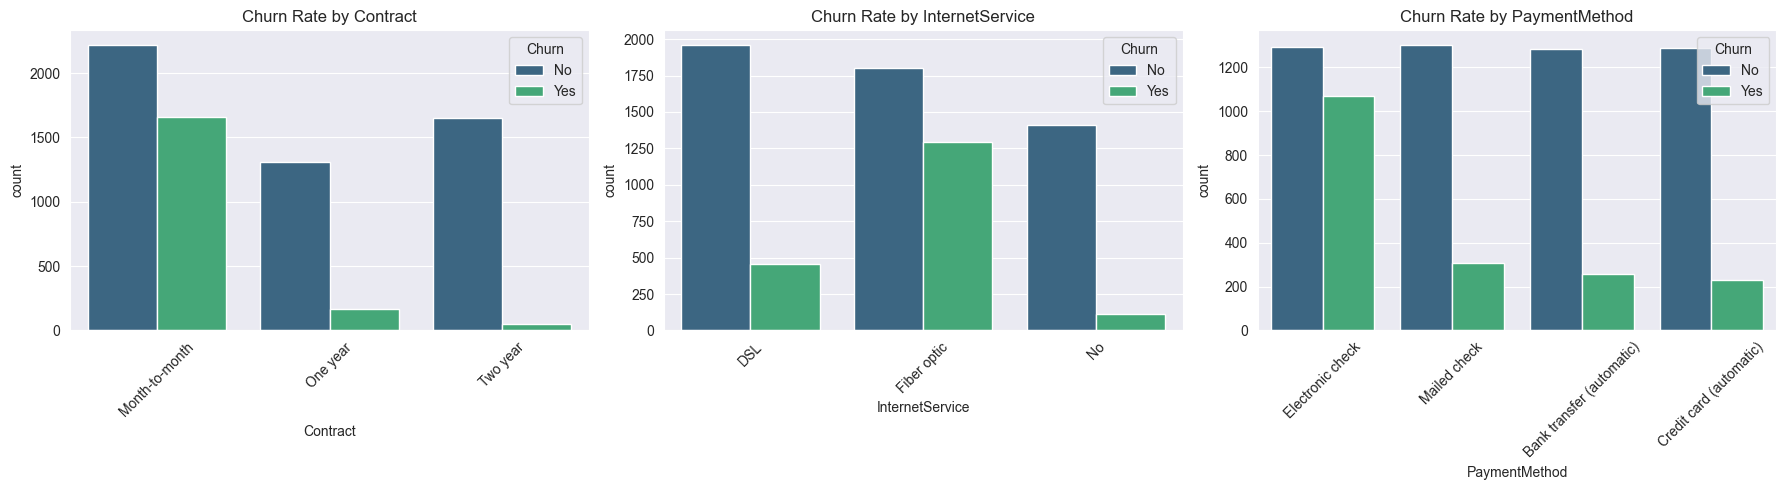

In [6]:
# columns we want to analyze
cat_cols = ['Contract', 'InternetService', 'PaymentMethod']

# Set up the plotting area


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through each column and create a plot
for i, col in enumerate(cat_cols):
    # Plot the count of Churn vs No Churn for this category
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='viridis')

    # Add titles and rotate text
    axes[i].set_title(f'Churn Rate by {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()